In [2]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
# %matplotlib inline     
sns.set(color_codes=True)

import random

# import scipy


In [ ]:
#logic
# start the game
# play then get reward of 4 and roll dice, if dice value is 1 or 2 then quit else continue the game
# or quit and get reward of 10

In [13]:
class DiceGameMDP:
    def __init__(self):
        self.states = ['Start', 'Roll Again', 'Game Over']
        self.current_state = 'Start'
        self.total_reward = 0

    def roll_dice(self):
        return random.randint(1, 6)


    # def take_action(self, action):
    #         # Handling actions in the Start state
    #         if self.current_state == 'Start':
    #             if action == 'Quit':
    #                 self.total_reward += 10
    #                 self.current_state = 'Game Over'
    #             elif action == 'Roll':
    #                 self.total_reward += 4
    #                 self.handle_roll()
    def take_action(self,action):
        if self.current_state == 'Start':
            if action == 'Quit':
                self.total_reward += 10
                self.current_state = 'Game Over'
            elif action == 'Roll':
                self.total_reward += 4
                self.handle_roll()
        elif self.current_state == 'Roll Again':
            if action == 'Roll':
                self.handle_roll()
        elif self.current_state == 'Game Over':
            print('Game is over. Please reset the game to play again.')
        return self.current_state


    
    def handle_roll(self):
        dice_value = self.roll_dice()
        if dice_value not in [1, 2]:
            self.total_reward += 4
            self.current_state = 'Roll Again'
        else:
            self.current_state = 'Game Over' 


    def playGame(self, action):
        self.current_state = 'Start'
        self.total_reward = 0
        while self.current_state != 'Game Over':
            print('Current State: ', self.current_state)
            self.take_action(action)
        return self.total_reward


In [14]:
# Example usage
dice_game_mdp = DiceGameMDP()
# Player decides to roll
dice_game_mdp.playGame('Roll')
print('Reward', dice_game_mdp.total_reward)

Current State:  Start
Current State:  Roll Again
Current State:  Roll Again
Current State:  Roll Again
Current State:  Roll Again
Current State:  Roll Again
Reward 24


In [16]:
# write policy evaluation function for gamemdp

def policy_evaluation(policy, mdp, iterations=10, discount_factor=0.9):
    """
    Evaluates the value of a policy using iterative policy evaluation
    """
    print(mdp.states)
    V = np.zeros(len(mdp.states))
    print(V)
    for i in range(iterations):
        for state in mdp.states:
            print(state)
            # get the action from the policy
            action = policy[state]
            print(action)
            # get the next state
            next_state = mdp.take_action(action)
            print(next_state)
            # get the reward
            #reward = mdp.get_reward(next_state)
            reward = mdp.total_reward
            # update the value function
            
            V[state] = reward + discount_factor * V[next_state]
            print(V)
    return V


policy = {'Start': 'Roll', 'Roll Again': 'Roll', 'Game Over': 'Quit'}

policyevaluation = policy_evaluation(policy, DiceGameMDP(), iterations=1, discount_factor=0.9)
print(policyevaluation)

['Start', 'Roll Again', 'Game Over']
[0. 0. 0.]
Start
Roll
Roll Again


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [17]:
def expected_reward_of_playing():
    """
    Calculate the expected reward for the 'Always Play' policy.
    """
    probability_of_continuing = 4/6  # Probability of rolling 3, 4, 5, or 6
    probability_of_ending = 1 - probability_of_continuing  # Probability of rolling 1 or 2
    reward_per_roll = 4

    # Expected reward is a sum of an infinite series: 4 + 4*(4/6) + 4*(4/6)^2 + 4*(4/6)^3 + ...
    expected_reward = reward_per_roll / probability_of_ending
    return expected_reward

def evaluate_policy(policy):
    """
    Evaluate the given policy.
    """
    if policy == "Always Play":
        return expected_reward_of_playing()
    elif policy == "Never Play":
        return 10  # Guaranteed reward for not playing
    else:
        raise ValueError("Unknown policy")

# Evaluate policies
reward_always_play = evaluate_policy("Always Play")
reward_never_play = evaluate_policy("Never Play")

print(f"Expected reward for 'Always Play' policy: {reward_always_play}")
print(f"Expected reward for 'Never Play' policy: {reward_never_play}")


Expected reward for 'Always Play' policy: 11.999999999999998
Expected reward for 'Never Play' policy: 10


In [20]:
def update_state_value(value):
    """
    Update the value of the 'Playing' state based on the expected reward.
    """
    reward_per_roll = 4
    probability_of_continuing = 4 / 6  # Probability of rolling 3, 4, 5, or 6
    probability_of_ending = 2 / 6  # Probability of rolling 1 or 2

    # Expected value: reward for current roll + discounted future value if game continues
    new_value = (probability_of_continuing * (reward_per_roll + value)) + (probability_of_ending * (reward_per_roll+ 0))
    return new_value

def policy_evaluation(policy, threshold=0.0001):
    """
    Iteratively evaluate the policy until convergence.
    """
    if policy == "Never Play":
        return 10

    state_value = 0  # Initial value of 'Playing' state
    while True:
        new_value = update_state_value(state_value)
        delta = abs(new_value - state_value)
        state_value = new_value

        if delta < threshold:  # Check for convergence
            break

    return state_value

# Evaluate 'Always Play' policy
value_always_play = policy_evaluation("Always Play")
print(f"Value of 'Always Play' policy: {value_always_play}")

# Evaluate 'Never Play' policy
value_never_play = policy_evaluation("Never Play")
print(f"Value of 'Never Play' policy: {value_never_play}")


Value of 'Always Play' policy: 11.999859192433627
Value of 'Never Play' policy: 10


In [21]:
def solve_recurrence_relation():
    """
    Solve the recurrence relation to find the expected value of 'Playing' state.
    """
    # Define the coefficients of the recurrence relation
    probability_of_continuing = 4 / 6
    reward_per_roll = 4

    # Solving the equation V = (4/6) * (4 + V)
    # Rearranging: V - (4/6) * V = (4/6) * 4
    # Simplifying: V * (1 - (4/6)) = (4/6) * 4
    V = (probability_of_continuing * reward_per_roll) / (1 - probability_of_continuing)
    return V

# Solve for the value of the 'Playing' state under the 'Always Play' policy
value_always_play = solve_recurrence_relation()
print(f"Value of 'Always Play' policy: {value_always_play}")

# The value for 'Never Play' policy is a constant 10
value_never_play = 10
print(f"Value of 'Never Play' policy: {value_never_play}")


Value of 'Always Play' policy: 7.999999999999999
Value of 'Never Play' policy: 10


In [23]:
# Constants
gamma = 1  # Assuming no discounting for simplicity
states = range(1, 7)  # Possible states based on dice roll
actions = ["Play", "Quit"]
rewards = {3: 4, 4: 4, 5: 4, 6: 4, 1: 0, 2: 0}  # Rewards for each dice roll
quit_reward = 10

# Initialize state values arbitrarily
V_pi = {s: 0 for s in states}

# Transition probabilities
def T(s, a, s_prime):
    if a == "Quit":
        return 0
    else:
        return 1/6 if s_prime in states else 0

# Define the policy
def policy(s):
    # Replace with actual policy logic
    # For example, always play unless the state is 1 or 2
    return "Play" if s not in [1, 2] else "Quit"

# Calculate the Q function for each state-action pair
def calculate_Q(V_pi, gamma):
    Q_pi = {}
    for s in states:
        for a in actions:
            Q_pi[(s, a)] = sum(T(s, a, s_prime) * (rewards.get(s_prime, 0) + gamma * V_pi[s_prime]) for s_prime in states)
            if a == "Quit":
                Q_pi[(s, a)] = quit_reward
    return Q_pi

# Update state values based on the Q function
def update_V(Q_pi):
    for s in states:
        V_pi[s] = max(Q_pi[(s, policy(s))], Q_pi[(s, "Quit")])

# Policy evaluation
def policy_evaluation(V_pi, gamma, threshold=0.01):
    while True:
        Q_pi = calculate_Q(V_pi, gamma)
        update_V(Q_pi)
        # Check for convergence (omitted for brevity)
        # ...

# Run the policy evaluation
def policy_evaluation(V_pi, gamma, threshold=0.01):
    while True:
        delta = 0  # This will track the maximum change in value for any state
        Q_pi = calculate_Q(V_pi, gamma)
        
        # Capture the old value for comparison
        old_V_pi = V_pi.copy()
        
        # Update state values based on the Q function
        update_V(Q_pi)
        
        # After the update, check if the value function has converged
        for s in states:
            delta = max(delta, abs(old_V_pi[s] - V_pi[s]))
        
        # If the maximum change in the value function is below the threshold, we stop
        if delta < threshold:
            break


# Print the resulting state values
for s in states:
    print(f"Value of state {s}: {V_pi[s]}")


Value of state 1: 0
Value of state 2: 0
Value of state 3: 0
Value of state 4: 0
Value of state 5: 0
Value of state 6: 0


In [53]:
## taking expectation
playgamecount = 100000
calculateexpectedreward = 0
rewards = np.array([])
for i in range(playgamecount):
    dice_game_mdp = DiceGameMDP()
    dice_game_mdp.take_action('Roll')
    result = dice_game_mdp.total_reward
    rewards = np.append(rewards,result)
    calculateexpectedreward += result
print('Total reward',calculateexpectedreward)
print('Expected reward',calculateexpectedreward/playgamecount)
print(rewards.shape)


Total reward 1197372
Expected reward 11.97372
(100000,)


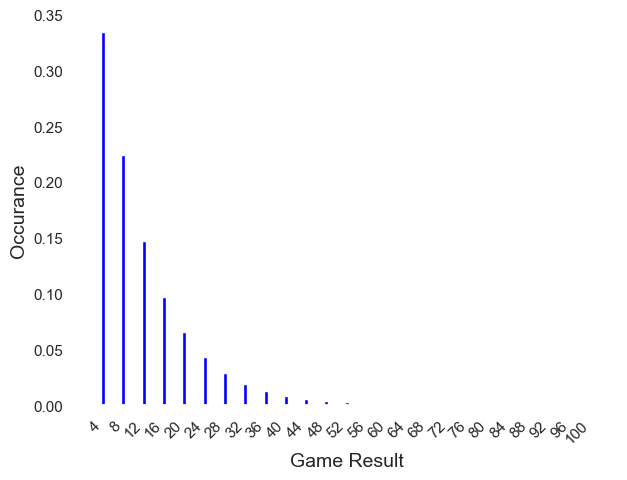

In [54]:
### Plot distirbution chart
rewards = pd.Series(rewards)
value_counts = rewards.value_counts()
plt.bar(value_counts.index, value_counts.values/rewards.shape[0], color='blue')

# Customize the plot (optional)
plt.title('Value Counts Bar Chart')
plt.xlabel('Values')
plt.ylabel('Counts')

# tenatsmoreinfo.hist(color='#D6D1C4', edgecolor='black', bins=20)
ax = plt.gca()
ax.set_facecolor('white')  # Set the background color of the plot area
plt.title('', fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.xlabel('Game Result', fontsize=14)
plt.ylabel('Occurance', fontsize=14)
plt.xticks(rotation=45, ha='right') 
plt.xticks(value_counts.index)


# Show the plot
plt.show()

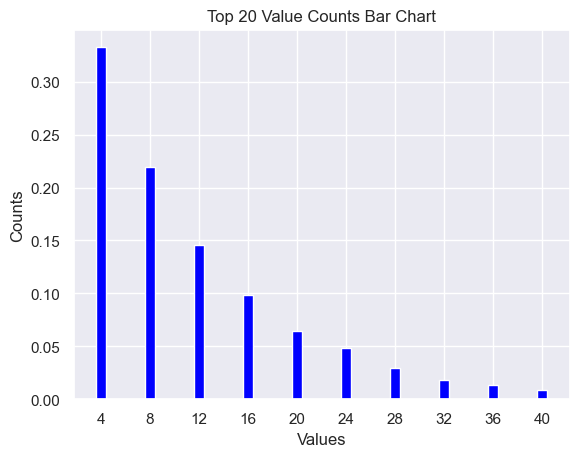

In [38]:
### Priobability distribution for top 10 values only
top_20_value_counts = value_counts.head(10)

# Create a bar chart
plt.bar(top_20_value_counts.index, top_20_value_counts.values/rewards.shape[0], color='blue')

# Customize the plot (optional)
plt.title('Top 20 Value Counts Bar Chart')
plt.xlabel('Values')
plt.ylabel('Counts')
plt.xticks(top_20_value_counts.index)

# Show the plot
plt.show()

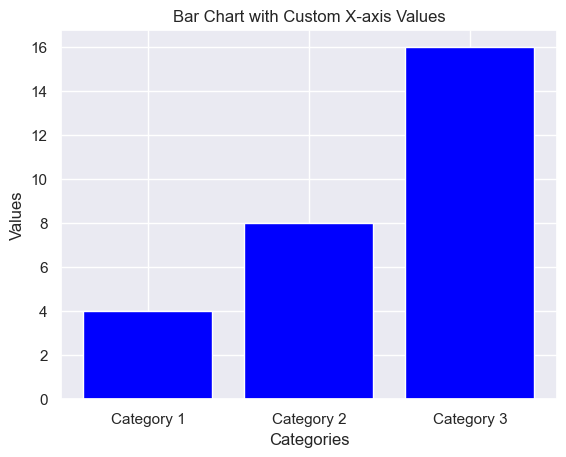

In [55]:
class VolcanoCrossingMDP:
    def __init__(self):
        self.states = ['Tile 1', 'Tile 2', 'Tile 3', 'Tile 4', 'Tile 5', 'Game Over']
        self.volcanic_tiles = ['Tile 3']  # Example: Tile 3 is volcanic
        self.goal_tile = 'Tile 5'
        self.actions = ['Move Forward', 'Stay']

    def take_action(self, state, action):
        if state in self.volcanic_tiles or state == self.goal_tile or state == 'Game Over':
            return 'Game Over', -10  # Large penalty for volcanic tile or game over state

        if action == 'Move Forward':
            next_state = f'Tile {int(state.split()[1]) + 1}'
            if next_state == self.goal_tile:
                return next_state, 10  # Reward for reaching the goal
            else:
                return next_state, -1  # Small penalty to encourage moving forward

        elif action == 'Stay':
            return state, -1  # Small penalty for staying

# Example usage
mdp = VolcanoCrossingMDP()
current_state = 'Tile 1'
action_taken = 'Move Forward'
new_state, reward = mdp.take_action(current_state, action_taken)
print(f"New state: {new_state}, Reward: {reward}")


New state: Tile 2, Reward: -1


In [61]:
class VolcanoCrossing2DMDP:
    def __init__(self, grid):
        self.grid = grid
        self.rows = len(grid)
        self.cols = len(grid[0])
        self.actions = ['Up', 'Down', 'Left', 'Right']
        self.goal = (2, 2)  # Assuming the goal is at (2, 2)
        self.game_over = False

    def is_valid(self, position):
        r, c = position
        return 0 <= r < self.rows and 0 <= c < self.cols

    def take_action(self, state, action):
        if self.game_over:
            return state, 0  # No reward if the game is over

        r, c = state
        new_state = (r, c)
        if action == 'Up' and self.is_valid((r - 1, c)):
            new_state = (r - 1, c)
        elif action == 'Down' and self.is_valid((r + 1, c)):
            new_state = (r + 1, c)
        elif action == 'Left' and self.is_valid((r, c - 1)):
            new_state = (r, c - 1)
        elif action == 'Right' and self.is_valid((r, c + 1)):
            new_state = (r, c + 1)

        # Check for volcanic or goal cell
        if self.grid[new_state[0]][new_state[1]] == 'V':
            self.game_over = True
            return new_state, -100  # Penalty for volcanic cell
        elif new_state == self.goal:
            return new_state, 100  # Reward for reaching the goal

        return new_state, -1  # Small penalty for each move

# Example usage
grid = [['S', '-', '-'], ['-', 'V', '-'], ['-', '-', 'G']]
mdp = VolcanoCrossing2DMDP(grid)
current_state = (0, 0)  # Starting position
action_taken = 'Right'  # Example action
new_state, reward = mdp.take_action(current_state, action_taken)
print(f"New state: {new_state}, Reward: {reward}")


New state: (0, 1), Reward: -1


In [62]:
class VolcanoCrossing2DMDP:
    def __init__(self, grid):
        self.grid = grid
        self.rows = len(grid)
        self.cols = len(grid[0])
        self.actions = ['Up', 'Down', 'Left', 'Right']
        self.goal = (2, 2)  # Goal is at (2, 2)
        self.game_over = False

    def is_valid(self, position):
        r, c = position
        return 0 <= r < self.rows and 0 <= c < self.cols

    def take_action(self, state, action):
        if self.game_over:
            return state, 0  # No reward if the game is over

        r, c = state
        new_state = (r, c)
        if action == 'Up' and self.is_valid((r - 1, c)):
            new_state = (r - 1, c)
        elif action == 'Down' and self.is_valid((r + 1, c)):
            new_state = (r + 1, c)
        elif action == 'Left' and self.is_valid((r, c - 1)):
            new_state = (r, c - 1)
        elif action == 'Right' and self.is_valid((r, c + 1)):
            new_state = (r, c + 1)

        # Check for volcanic or goal cell
        if self.grid[new_state[0]][new_state[1]] == 'V':
            self.game_over = True
            return new_state, -100  # Penalty for volcanic cell
        elif new_state == self.goal:
            return new_state, 100  # Reward for reaching the goal

        return new_state, -1  # Small penalty for each move

# Example usage
grid = [['S', '-', '-'], ['-', 'V', '-'], ['-', '-', 'G']]
mdp = VolcanoCrossing2DMDP(grid)
current_state = (0, 0)  # Starting position

# Play the game with the given action sequence
sequence_of_actions = ['Right', 'Right', 'Down', 'Down']  # A sequence of actions

for action in sequence_of_actions:
    new_state, reward = mdp.take_action(current_state, action)
    print(f"Action: {action}, New State: {new_state}, Reward: {reward}")
    current_state = new_state

    if mdp.game_over:
        print("Game Over!")
        break

print(f"Final State: {current_state}")


Action: Right, New State: (0, 1), Reward: -1
Action: Right, New State: (0, 2), Reward: -1
Action: Down, New State: (1, 2), Reward: -1
Action: Down, New State: (2, 2), Reward: 100
Final State: (2, 2)


In [65]:
# <!-- S - - 
# - V - 
# - - G  -->
